In [1]:
import os 
import matplotlib.pyplot as plt 

import tensorflow as tf 

print(tf.__version__)
print(tf.executing_eagerly())

2.3.1
True


In [2]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset file: /Users/mei/.keras/datasets/iris_training.csv


In [5]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [6]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: [&#39;sepal_length&#39;, &#39;sepal_width&#39;, &#39;petal_length&#39;, &#39;petal_width&#39;]
Label: species


In [7]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']


In [8]:
batch_size = 32
train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size=batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1
)

In [9]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([(&#39;sepal_length&#39;, &lt;tf.Tensor: shape=(32,), dtype=float32, numpy=
array([6.4, 4.6, 5.8, 4.7, 5.1, 4.8, 4.6, 6.8, 6.8, 5.5, 7.2, 6.5, 4.4,
       5.5, 7.6, 7. , 4.7, 6.7, 6.2, 7.2, 5.7, 7.7, 6.1, 7.3, 4.9, 6. ,
       5.8, 4.9, 6.3, 6.3, 6.3, 4.8], dtype=float32)&gt;), (&#39;sepal_width&#39;, &lt;tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.2, 3.2, 2.8, 3.2, 3.7, 3. , 3.1, 2.8, 3.2, 2.4, 3.6, 2.8, 3. ,
       2.6, 3. , 3.2, 3.2, 3. , 2.2, 3. , 3. , 2.6, 2.6, 2.9, 3.1, 2.9,
       2.7, 2.4, 2.5, 3.3, 3.3, 3. ], dtype=float32)&gt;), (&#39;petal_length&#39;, &lt;tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4.5, 1.4, 5.1, 1.6, 1.5, 1.4, 1.5, 4.8, 5.9, 3.7, 6.1, 4.6, 1.3,
       4.4, 6.6, 4.7, 1.3, 5.2, 4.5, 5.8, 4.2, 6.9, 5.6, 6.3, 1.5, 4.5,
       4.1, 3.3, 5. , 6. , 4.7, 1.4], dtype=float32)&gt;), (&#39;petal_width&#39;, &lt;tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.5, 0.2, 2.4, 0.2, 0.4, 0.1, 0.2, 1.4, 2.3, 1. , 2.5, 1.5, 0.2,
       1

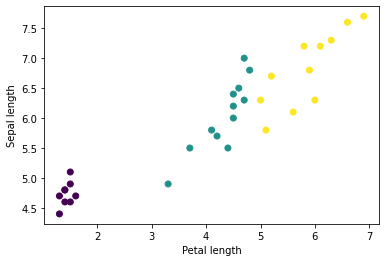

In [10]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [13]:
def pack_features_vector(features, labels):
  """特徴量を1つの配列にパックする"""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels
train_dataset = train_dataset.map(pack_features_vector)

In [14]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[6.7 3.1 5.6 2.4]
 [6.5 3.  5.5 1.8]
 [7.7 3.8 6.7 2.2]
 [6.  2.2 5.  1.5]
 [5.4 3.9 1.7 0.4]], shape=(5, 4), dtype=float32)


In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.Dense(10,activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])

In [16]:
predictions = model(features)
predictions[:5]

&lt;tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-3.0177925, -5.9358115, -1.2971034],
       [-2.8498151, -5.768354 , -1.3966823],
       [-3.385333 , -6.890073 , -1.6309557],
       [-2.5679255, -5.256849 , -1.3618386],
       [-2.6780076, -4.399171 , -1.2147921]], dtype=float32)&gt;

In [17]:
tf.nn.softmax(predictions[:5])

&lt;tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.15054758, 0.00813569, 0.84131676],
       [0.18759954, 0.01013273, 0.8022678 ],
       [0.146845  , 0.00441337, 0.8487417 ],
       [0.22684269, 0.01541488, 0.7577425 ],
       [0.18186165, 0.03252741, 0.785611  ]], dtype=float32)&gt;

In [18]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
    Labels: [2 2 2 2 0 0 1 1 2 1 2 0 1 1 1 2 1 1 1 0 1 1 2 1 0 2 1 2 2 0 2 2]


In [19]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [20]:
def loss(model, x, y):
  y_ = model(x)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels)
print("Loss test: {}".format(l))

Loss test: 1.994223952293396


In [21]:
def grad(model, inputs,targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [22]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [23]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels).numpy()))

Step: 0, Initial Loss: 1.994223952293396
Step: 1,         Loss: 1.7166619300842285


In [24]:
## Note: このセルを再実行すると同じモデル変数が使われます

# 結果をグラフ化のために保存
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # 訓練ループ - 32個ずつのバッチを使用
  for x, y in train_dataset:
    # モデルの最適化
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # 進捗の記録
    epoch_loss_avg(loss_value)  # Add current batch loss 現在のバッチの損失を加算
    # 予測ラベルと実際のラベルを比較
    epoch_accuracy(y, model(x))
    
  # エポックの終わり
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.404, Accuracy: 35.000%
Epoch 050: Loss: 0.064, Accuracy: 98.333%
Epoch 100: Loss: 0.046, Accuracy: 98.333%
Epoch 150: Loss: 0.063, Accuracy: 98.333%
Epoch 200: Loss: 0.043, Accuracy: 98.333%


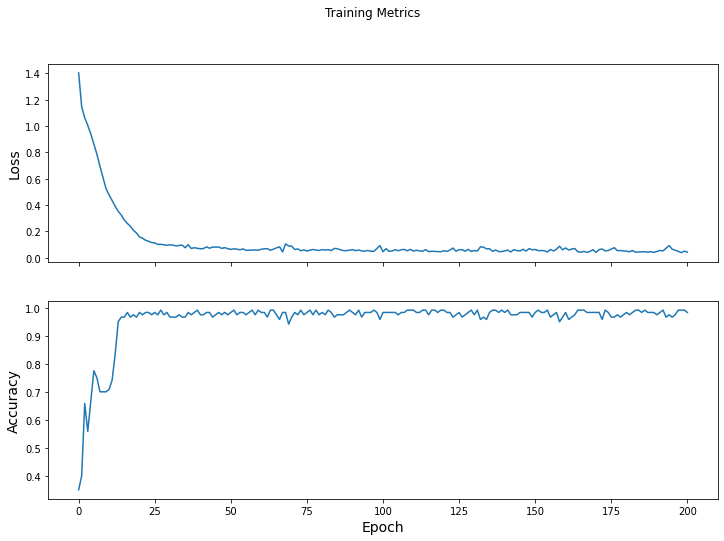

In [25]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()